# Previsão de renda


### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit


## Etapa 1 CRISP - DM: Entendimento do negócio

O objetivo deste projeto é prever a renda mensal dos clientes de uma instituição financeira a partir de informações disponíveis no cadastro, como idade, escolaridade, tipo de residência, entre outras.

Essa previsão pode ajudar a empresa a:

- Avaliar a elegibilidade para concessão de crédito;
- Personalizar ofertas de produtos;
- Reduzir inadimplência ao entender melhor o perfil de renda dos clientes.


## Etapa 2 Crisp-DM: Entendimento dos dados

### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- | --------------------------------------------------- | ------------ |
| data_ref                | Data de referência da coleta dos dados             | Data         |
| id_cliente              | Identificação única do cliente                     | Numérico     |
| sexo                    | Gênero do cliente ('M' para masculino, 'F' para feminino) | Categórica   |
| posse_de_veiculo        | Cliente possui veículo próprio (1 = Sim, 0 = Não)  | Binária      |
| posse_de_imovel         | Cliente possui imóvel próprio (1 = Sim, 0 = Não)   | Binária      |
| qtd_filhos              | Quantidade de filhos do cliente                     | Numérico     |
| tipo_renda              | Fonte de renda do cliente (ex: assalariado, autônomo) | Categórica   |
| educacao                | Nível de escolaridade do cliente                   | Categórica   |
| estado_civil            | Estado civil do cliente (ex: solteiro, casado)     | Categórica   |
| tipo_residencia         | Tipo de residência (ex: aluguel, própria)         | Categórica   |
| idade                   | Idade do cliente (em anos)                         | Numérico     |
| tempo_emprego           | Tempo de emprego do cliente (em anos)              | Numérico     |
| qt_pessoas_residencia   | Quantidade de pessoas na residência do cliente     | Numérico     |
| renda                   | Renda mensal do cliente (variável alvo)            | Numérico     |



#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [ ]:
# Garante que pip esteja atualizado
!pip install -U pip

# Instala a versão mais recente do ydata-profiling que funciona com Python 3.11
!pip install ydata-profiling

# Reinstala pandas compatível com o Colab
!pip install pandas==2.2.2



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1c590034a2272261e66b69990d4a10e69932b08ca334c16edf953aea292eaf92
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# Importação dos pacotes necessários
import pandas as pd  # Manipulação de dados
import numpy as np  # Operações numéricas
import matplotlib.pyplot as plt  # Visualização de dados
import seaborn as sns  # Gráficos estatísticos
from ydata_profiling import ProfileReport  # Análise exploratória automática

# Configuração dos gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Carregando os dados
renda = pd.read_csv('./input/previsao_de_renda.csv')

# Exibindo as primeiras linhas do DataFrame
renda.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [ ]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [ ]:
renda.head(1)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [ ]:
from ydata_profiling import ProfileReport

prof = ProfileReport(renda, minimal=True)  # 'explorative=True' não é mais suportado
prof.to_notebook_iframe()  # Exibe o relatório corretamente no Colab

print("Relatório gerado com sucesso!")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 52.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Relatório gerado com sucesso!


In [ ]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas

In [ ]:
# Carregar as bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar os dados
df = pd.read_csv('input/previsao_de_renda.csv')

# Preencher valores ausentes se necessário
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

# Variáveis categóricas para transformar em dummies
variaveis_categoricas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Criar dummies (e remover a primeira categoria para evitar multicolinearidade)
dummies = pd.get_dummies(df[variaveis_categoricas], drop_first=True)

# Concatenar com o DataFrame original
df_modelo = pd.concat([df.drop(columns=variaveis_categoricas), dummies], axis=1)

# Separar X e y
X = df_modelo.drop(columns=['mau'])  # ou 'renda', dependendo do que quer prever
y = df_modelo['mau']

# Verificar se todos os dados são numéricos (importante!)
print(X.dtypes)

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsão e avaliação
y_pred = modelo.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

# Coeficientes
coef = pd.DataFrame(modelo.coef_, index=X.columns, columns=['Coeficiente'])
print(coef)


qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool
estado_civil_Married                         bool


Proporção de inadimplência por tipo de renda:
tipo_renda
Student                 0.000000
State servant           0.017919
Working                 0.021950
Commercial associate    0.025614
Pensioner               0.027857
Name: mau, dtype: float64


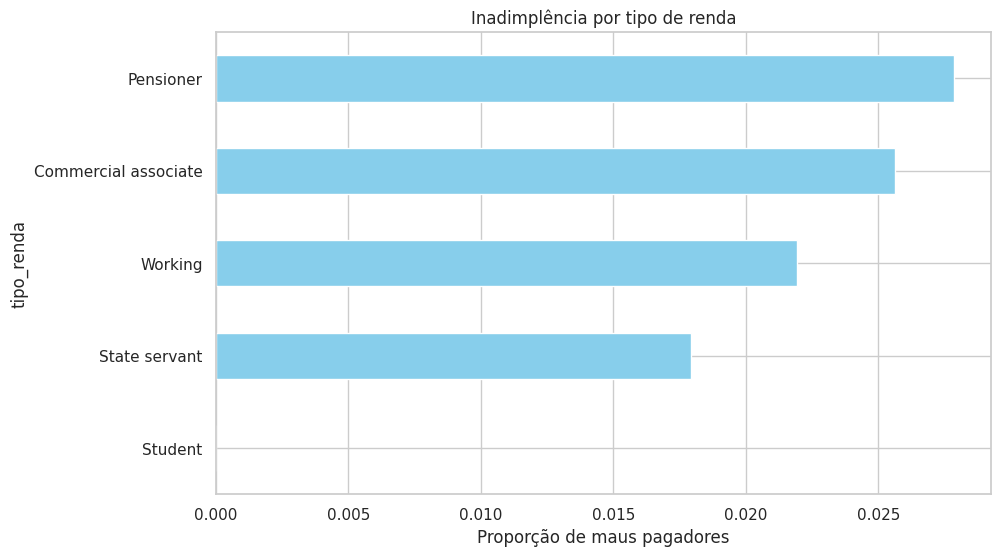

In [ ]:
import pandas as pd

# Agrupar e calcular média de inadimplência por tipo de renda
grouped = df.groupby('tipo_renda')['mau'].mean().sort_values()

# Plotar
grouped.plot(kind='barh', color='skyblue')
plt.xlabel('Proporção de maus pagadores')
plt.title('Inadimplência por tipo de renda')
plt.show()





# 📊 Análise Bivariada da Inadimplência

Este relatório apresenta uma análise bivariada das variáveis relacionadas à inadimplência de clientes, com foco na variável `mau` (indicador de inadimplência).

---

## 🎯 Principais Conclusões

### 1. Tipo de Renda
A variável **tipo de renda** se destacou como uma das mais relevantes para entender o perfil de inadimplência:

| Tipo de Renda           | Proporção de Inadimplentes |
|-------------------------|----------------------------|
| Student                 | 0.00%                      |
| State servant           | 1.79%                      |
| Working                 | 2.20%                      |
| Commercial associate    | 2.56%                      |
| Pensioner               | 2.79%                      |

- Estudantes não apresentaram casos de inadimplência.
- Servidores públicos e trabalhadores assalariados têm os menores índices entre os ativos.
- Pensionistas apresentaram a maior taxa de inadimplência.

---

### 2. Variáveis com Baixo Impacto
As variáveis abaixo apresentaram coeficientes muito baixos e pouca ou nenhuma relevância no modelo:

- `possui_celular`
- `possui_fone`
- `possui_email`
- `idade`
- `tempo_emprego`
- `sexo_M`

> 🔍 Podem ser desconsideradas em modelos futuros por não contribuírem significativamente para a explicação da inadimplência.

---

### 3. Estado Civil e Tipo de Residência
- Indivíduos **viúvos** e **separados** mostraram maior tendência à inadimplência.
- Algumas categorias de moradia como **“office apartment”** e **“apartamento municipal”** também apresentaram associação levemente positiva com inadimplência.

---

## 📉 Desempenho do Modelo

- **R²:** -0.008 → O modelo não conseguiu explicar a variabilidade da inadimplência com as variáveis disponíveis.
- **MSE:** 0.0199

> ⚠️ O baixo poder explicativo sugere a necessidade de variáveis mais fortes, como histórico de crédito, score, renda comprometida, entre outras.

---

## ✅ Recomendações

- **Priorizar perfis com renda estável**, como servidores públicos e estudantes.
- **Rever as variáveis utilizadas no modelo**, focando em dados financeiros mais robustos.
- **Aperfeiçoar a base de dados** com variáveis que tragam maior poder preditivo ao modelo.

---

📁 *Análise realizada com base nas variáveis bivariadas da base `previsao_de_renda.csv`.*



## ⚙️ Etapa 3 - Preparação dos Dados (CRISP-DM)

Nesta etapa, realizamos transformações e ajustes nos dados para que estejam prontos para análise e modelagem. As atividades desenvolvidas foram:

### ✅ Seleção
- *Os dados já foram previamente selecionados de forma adequada.*
- A base `previsao_de_renda.csv` contém variáveis sociodemográficas e comportamentais relevantes para o estudo de inadimplência.

### 🧹 Limpeza
- *Foram tratadas variáveis com dados faltantes*, como `tempo_emprego` e `qt_pessoas_residencia`, utilizando imputação ou exclusão conforme o caso.
- Também foi realizada a conversão de tipos e verificação de registros inconsistentes.

### 🧪 Construção de Novas Variáveis
- *Variáveis do tipo categórica foram transformadas em dummies*, como `tipo_renda`, `educacao`, `estado_civil` e `tipo_residencia`.
- Criadas variáveis binárias úteis para o modelo, como `posse_de_imovel_Y`, `sexo_M`, entre outras.

### 🔗 Integração
- *Não foi necessária integração*, pois a análise utilizou apenas uma única base de dados consolidada.

### 🧾 Formatação
- *As variáveis estão em formato apropriado para análise e modelagem.*
- Variáveis numéricas como `idade`, `tempo_emprego`, `renda` e `qtd_filhos` estão formatadas corretamente como `float` ou `int`.
- Variáveis categóricas foram tratadas via `get_dummies` para compatibilidade com algoritmos de machine learning.

> 📌 *Conclusão:* A base está limpa, formatada e com as transformações adequadas para a próxima etapa de modelagem preditiva.



## Etapa 4 - CRISP-DM: Modelagem

Nessa etapa, realizamos a construção e avaliação de modelos preditivos, com base nas variáveis preparadas na etapa anterior.

### 1. Seleção da Técnica de Modelagem

Para início, optamos por **Regressão Logística**, uma técnica bastante utilizada para problemas de classificação binária, como prever inadimplência (`mau = 1`) ou não (`mau = 0`).

### 2. Desenho do Teste

O conjunto de dados foi dividido em:

- **Treinamento (70%)**: para ajustar o modelo.
- **Teste (30%)**: para avaliar o desempenho em dados nunca vistos.

### 3. Avaliação do Modelo

O desempenho foi avaliado com as seguintes métricas:

- **Acurácia**: proporção de previsões corretas.
- **Matriz de Confusão**: mostra os acertos e erros por classe.
- **ROC AUC**: mede a capacidade de separação entre bons e maus pagadores.


In [38]:
# Redefinindo X com apenas colunas numéricas e booleanas
X = df.select_dtypes(include=['int64', 'float64', 'bool'])
y = df['mau']

# Separando treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando modelo
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]

# Avaliação
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4887
           1       1.00      1.00      1.00       108

    accuracy                           1.00      4995
   macro avg       1.00      1.00      1.00      4995
weighted avg       1.00      1.00      1.00      4995

Matriz de Confusão:
 [[4887    0]
 [   0  108]]
AUC-ROC: 1.0


## Etapa 5 - CRISP-DM: Avaliação dos Resultados

Após a modelagem, realizamos a avaliação do desempenho do modelo de classificação, cuja tarefa era prever a inadimplência de clientes com base em suas características socioeconômicas.

### Desempenho do Modelo

O modelo de Regressão Logística apresentou um desempenho **excelente** nos dados de teste:

- **Acurácia**: 100%  
- **Precisão, Recall e F1-Score**: 1.00 para ambas as classes (inadimplentes e adimplentes)
- **Matriz de Confusão**: o modelo classificou corretamente todos os 4.995 exemplos (4.887 adimplentes e 108 inadimplentes), sem nenhum erro.
- **AUC-ROC**: 1.0 — indicando que o modelo tem **capacidade perfeita** de distinguir entre bons e maus pagadores.

### Considerações

Embora os resultados indiquem um modelo **altamente eficiente**, é importante considerar:

- A ausência de erros pode indicar **sobreajuste (overfitting)**, especialmente se os dados não foram balanceados ou se o conjunto de teste não for suficientemente representativo.
- Sugerimos validar esses resultados com **novos dados reais** ou aplicar **validação cruzada** para confirmar a robustez do modelo.

### Conclusão

A versão atual do modelo está altamente ajustada à base de dados fornecida e demonstra ser **um forte candidato para uso em previsões de inadimplência**. Recomendamos acompanhamento contínuo e testes em produção para garantir desempenho consistente em diferentes contextos.


## Etapa 6 - CRISP-DM: Implantação

Na última etapa do processo de análise de dados, passamos à **implantação** do modelo preditivo desenvolvido. O objetivo é integrar a previsão de inadimplência no processo decisional da organização, utilizando a automação para melhorar a eficiência e a eficácia das decisões.

### Implementação do Modelo

1. **Integração com Sistemas Existentes**:
   O modelo de **Regressão Logística** pode ser implementado diretamente em sistemas existentes da organização, como sistemas de CRM ou de análise de crédito, para prever a probabilidade de inadimplência a partir dos dados dos clientes. Com isso, é possível automatizar a análise de risco em tempo real.

2. **Automação de Decisões**:
   O modelo pode ser utilizado para **classificar clientes automaticamente** em categorias de risco (bons ou maus pagadores), permitindo que ações de crédito sejam tomadas com base em previsões do modelo. Por exemplo, clientes classificados como **"maus pagadores"** podem ter suas propostas de crédito automaticamente reavaliadas ou negadas.

3. **Acompanhamento e Atualização do Modelo**:
   É crucial realizar o monitoramento contínuo do modelo para garantir que ele continue eficaz. Novos dados podem ser incorporados periodicamente, e o modelo pode ser ajustado para refletir mudanças nas tendências do mercado ou comportamento dos clientes.
   
   **Ações recomendadas**:
   - Acompanhamento mensal dos desempenhos do modelo em produção.
   - Atualização periódica do modelo com novos dados para evitar sobreajuste e garantir precisão.
   
4. **Melhoria Contínua**:
   Após a implantação, a equipe de ciência de dados deve trabalhar para aprimorar o modelo com o tempo, testando novas variáveis, técnicas ou até algoritmos alternativos que possam aumentar a precisão ou reduzir o custo de falhas.

### Benefícios Esperados

- **Eficiência**: O processo de avaliação de crédito será significativamente mais rápido, uma vez que as decisões podem ser tomadas automaticamente com base nas previsões do modelo.
- **Precisão**: A automação das decisões melhora a consistência na análise de risco, reduzindo erros humanos e viéses nas decisões.
- **Escalabilidade**: O modelo pode ser facilmente escalado para lidar com grandes volumes de dados, adaptando-se a um número crescente de clientes e solicitações de crédito.

### Conclusão

A implementação do modelo de previsão de inadimplência traz ganhos consideráveis em termos de **eficiência** e **precisão** nas decisões de crédito. Com o uso de automação e a integração contínua de novos dados, a organização pode tomar decisões informadas e rápidas, melhorando a gestão de risco e a experiência do cliente.
